<a href="https://colab.research.google.com/github/FKz11/study_mpei/blob/main/lab234_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка данных лабораторных работ 3-4

### Загружаем библиотеки

In [150]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Загружаем данные 

In [151]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [152]:
data2_ideal=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab2_in.txt", sep=' ', names=['f2', 'f3', 'f4'], index_col = False)
data2_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/brig5_lab2_out.txt", sep=' ', names=['A1', 'A2', 'A3', 'A4', 'A5'], index_col = False)
data3_ideal = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab3_in.txt", sep=' ', names=['f2', 'f3', 'f4'], index_col = False)
data3_real = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab3_out.txt", sep=' ', names=['A1', 'A2', 'A3', 'A4', 'A5'], index_col = False)
data4 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lr4_br5.txt", sep=' ', names=['dp', 'A2_in', 'A2_out', 'A3_in', 'A3_out', 'A4_in', 'A4_out'], index_col = False)
data4_ideal = data4[['A2_in', 'A3_in', 'A4_in']].rename({'A2_in': 'A2', 'A3_in': 'A3', 'A4_in': 'A4'}, axis=1)
data4_real = data4[['A2_out', 'A3_out', 'A4_out']].rename({'A2_out': 'A2', 'A3_out': 'A3', 'A4_out': 'A4'}, axis=1)

In [153]:
data2_ideal.head()

,f2,f3,f4
0,-0.944265,2.127559,-0.612497
1,-0.938983,2.127567,-0.617788
2,-0.933689,2.127543,-0.623058
3,-0.928384,2.127488,-0.628308
4,-0.923069,2.127402,-0.633536


In [154]:
data2_real.head()

,A1,A2,A3,A4,A5
0,2.949583,0.190238,-0.437844,1.216504,2.93
1,2.949583,0.190238,-0.437844,1.216504,2.93
2,2.949573,0.190278,-0.437844,1.216261,2.93
3,2.949573,0.191093,-0.437844,1.213274,2.93
4,2.949573,0.195292,-0.437859,1.204845,2.93


In [155]:
data3_ideal.head()

,f2,f3,f4
0,-0.944265,2.127559,-0.612497
1,-0.938988,2.127583,-0.617798
2,-0.933694,2.127559,-0.623069
3,-0.928389,2.127504,-0.628318
4,-0.923074,2.127417,-0.633547


In [156]:
data3_real.head()

,A1,A2,A3,A4,A5
0,2.949583,0.190238,-0.437844,1.216504,2.93
1,2.949583,0.190238,-0.437844,1.216504,2.93
2,2.949573,0.190268,-0.437828,1.216283,2.93
3,2.949573,0.190711,-0.437828,1.213141,2.93
4,2.949573,0.194154,-0.437844,1.204690,2.93


In [157]:
data4_ideal.head()

,A2,A3,A4
0,0.1902,-0.4378,1.2165
1,0.1930,-0.4351,1.2110
2,0.1983,-0.4351,1.2057
3,0.2036,-0.4351,1.2004
4,0.2089,-0.4351,1.1951


In [158]:
data4_real.head()

,A2,A3,A4
0,0.1902,-0.4378,1.2165
1,0.1903,-0.4377,1.2163
2,0.1909,-0.4360,1.2127
3,0.1946,-0.4354,1.2046
4,0.2006,-0.4354,1.1956


### Обрабатываем данные

In [159]:
dt=0.05
d1=0.033
l1=0.075
l2=0.155
l3=0.135
l45=0.2176

In [160]:
data2_real['f1'] = 2.9496 - data2_real['A1']
data2_real['f2'] = data2_real['A2'] - 1.1345
data2_real['f3'] = data2_real['A3'] + 2.5654
data2_real['f4'] = data2_real['A4'] - 1.8290
data2_real['f5'] = 2.930 - data2_real['A5']
data2_real.head()

,A1,A2,A3,A4,A5,f1,f2,f3,f4,f5
0,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07
1,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07
2,2.949573,0.190278,-0.437844,1.216261,2.93,0.000027,-0.944222,2.127556,-0.612739,1.700000e-07
3,2.949573,0.191093,-0.437844,1.213274,2.93,0.000027,-0.943407,2.127556,-0.615726,1.700000e-07
4,2.949573,0.195292,-0.437859,1.204845,2.93,0.000027,-0.939208,2.127541,-0.624155,1.700000e-07


In [161]:
data3_real['f1'] = 2.9496 - data3_real['A1']
data3_real['f2'] = data3_real['A2'] - 1.1345
data3_real['f3'] = data3_real['A3'] + 2.5654
data3_real['f4'] = data3_real['A4'] - 1.8290
data3_real['f5'] = 2.930 - data3_real['A5']
data3_real.head()

,A1,A2,A3,A4,A5,f1,f2,f3,f4,f5
0,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07
1,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07
2,2.949573,0.190268,-0.437828,1.216283,2.93,0.000027,-0.944232,2.127572,-0.612717,1.700000e-07
3,2.949573,0.190711,-0.437828,1.213141,2.93,0.000027,-0.943789,2.127572,-0.615859,1.700000e-07
4,2.949573,0.194154,-0.437844,1.204690,2.93,0.000027,-0.940346,2.127556,-0.624310,1.700000e-07


In [162]:
data4_ideal['f2'] = data4_ideal['A2'] - 1.1345
data4_ideal['f3'] = data4_ideal['A3'] + 2.5654
data4_ideal['f4'] = data4_ideal['A4'] - 1.8290
data4_ideal.head()

,A2,A3,A4,f2,f3,f4
0,0.1902,-0.4378,1.2165,-0.9443,2.1276,-0.6125
1,0.1930,-0.4351,1.2110,-0.9415,2.1303,-0.6180
2,0.1983,-0.4351,1.2057,-0.9362,2.1303,-0.6233
3,0.2036,-0.4351,1.2004,-0.9309,2.1303,-0.6286
4,0.2089,-0.4351,1.1951,-0.9256,2.1303,-0.6339


In [163]:
data4_real['f2'] = data4_real['A2'] - 1.1345
data4_real['f3'] = data4_real['A3'] + 2.5654
data4_real['f4'] = data4_real['A4'] - 1.8290
data4_real.head()

,A2,A3,A4,f2,f3,f4
0,0.1902,-0.4378,1.2165,-0.9443,2.1276,-0.6125
1,0.1903,-0.4377,1.2163,-0.9442,2.1277,-0.6127
2,0.1909,-0.4360,1.2127,-0.9436,2.1294,-0.6163
3,0.1946,-0.4354,1.2046,-0.9399,2.1300,-0.6244
4,0.2006,-0.4354,1.1956,-0.9339,2.1300,-0.6334


In [164]:
def add_t(df, t_start=0):
  t = t_start
  t_list = []
  for i in range(len(df)):
    t_list.append(t)
    t += dt
  df['t'] = t_list
  t -= dt
  print(round(t, 12), 'c')

In [165]:
add_t(data2_ideal)
data2_ideal.head()

20.0 c


,f2,f3,f4,t
0,-0.944265,2.127559,-0.612497,0.00
1,-0.938983,2.127567,-0.617788,0.05
2,-0.933689,2.127543,-0.623058,0.10
3,-0.928384,2.127488,-0.628308,0.15
4,-0.923069,2.127402,-0.633536,0.20


In [166]:
add_t(data2_real)
data2_real.head()

20.0 c


,A1,A2,A3,A4,A5,f1,f2,f3,f4,f5,t
0,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07,0.00
1,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07,0.05
2,2.949573,0.190278,-0.437844,1.216261,2.93,0.000027,-0.944222,2.127556,-0.612739,1.700000e-07,0.10
3,2.949573,0.191093,-0.437844,1.213274,2.93,0.000027,-0.943407,2.127556,-0.615726,1.700000e-07,0.15
4,2.949573,0.195292,-0.437859,1.204845,2.93,0.000027,-0.939208,2.127541,-0.624155,1.700000e-07,0.20


In [167]:
add_t(data3_ideal)
data3_ideal.head()

20.0 c


,f2,f3,f4,t
0,-0.944265,2.127559,-0.612497,0.00
1,-0.938988,2.127583,-0.617798,0.05
2,-0.933694,2.127559,-0.623069,0.10
3,-0.928389,2.127504,-0.628318,0.15
4,-0.923074,2.127417,-0.633547,0.20


In [168]:
add_t(data3_real)
data3_real.head()

20.0 c


,A1,A2,A3,A4,A5,f1,f2,f3,f4,f5,t
0,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07,0.00
1,2.949583,0.190238,-0.437844,1.216504,2.93,0.000017,-0.944262,2.127556,-0.612496,1.700000e-07,0.05
2,2.949573,0.190268,-0.437828,1.216283,2.93,0.000027,-0.944232,2.127572,-0.612717,1.700000e-07,0.10
3,2.949573,0.190711,-0.437828,1.213141,2.93,0.000027,-0.943789,2.127572,-0.615859,1.700000e-07,0.15
4,2.949573,0.194154,-0.437844,1.204690,2.93,0.000027,-0.940346,2.127556,-0.624310,1.700000e-07,0.20


In [169]:
add_t(data4_ideal, t_start=dt)
data4_ideal.head()

20.0 c


,A2,A3,A4,f2,f3,f4,t
0,0.1902,-0.4378,1.2165,-0.9443,2.1276,-0.6125,0.05
1,0.1930,-0.4351,1.2110,-0.9415,2.1303,-0.6180,0.10
2,0.1983,-0.4351,1.2057,-0.9362,2.1303,-0.6233,0.15
3,0.2036,-0.4351,1.2004,-0.9309,2.1303,-0.6286,0.20
4,0.2089,-0.4351,1.1951,-0.9256,2.1303,-0.6339,0.25


In [170]:
add_t(data4_real, t_start=dt)
data4_real.head()

20.0 c


,A2,A3,A4,f2,f3,f4,t
0,0.1902,-0.4378,1.2165,-0.9443,2.1276,-0.6125,0.05
1,0.1903,-0.4377,1.2163,-0.9442,2.1277,-0.6127,0.10
2,0.1909,-0.4360,1.2127,-0.9436,2.1294,-0.6163,0.15
3,0.1946,-0.4354,1.2046,-0.9399,2.1300,-0.6244,0.20
4,0.2006,-0.4354,1.1956,-0.9339,2.1300,-0.6334,0.25


### Графики изменения углов

In [171]:
def plot_f(df):
  fig, ax = plt.subplots(nrows=3, figsize=(10, 25))
  axs = ax.flatten()
  for i in range(1,4):

    axs[i-1].plot(df['t'], df[f'f{i+1}'])
    axs[i-1].set_title(f"f{i+1}")
    axs[i-1].set_xlabel("t, c", fontsize=12)
    axs[i-1].set_ylabel("f, рад.", fontsize=12)
    axs[i-1].set_xlim(min(df['t']), max(df['t']))
    axs[i-1].grid()

  plt.subplots_adjust(hspace=0.3)

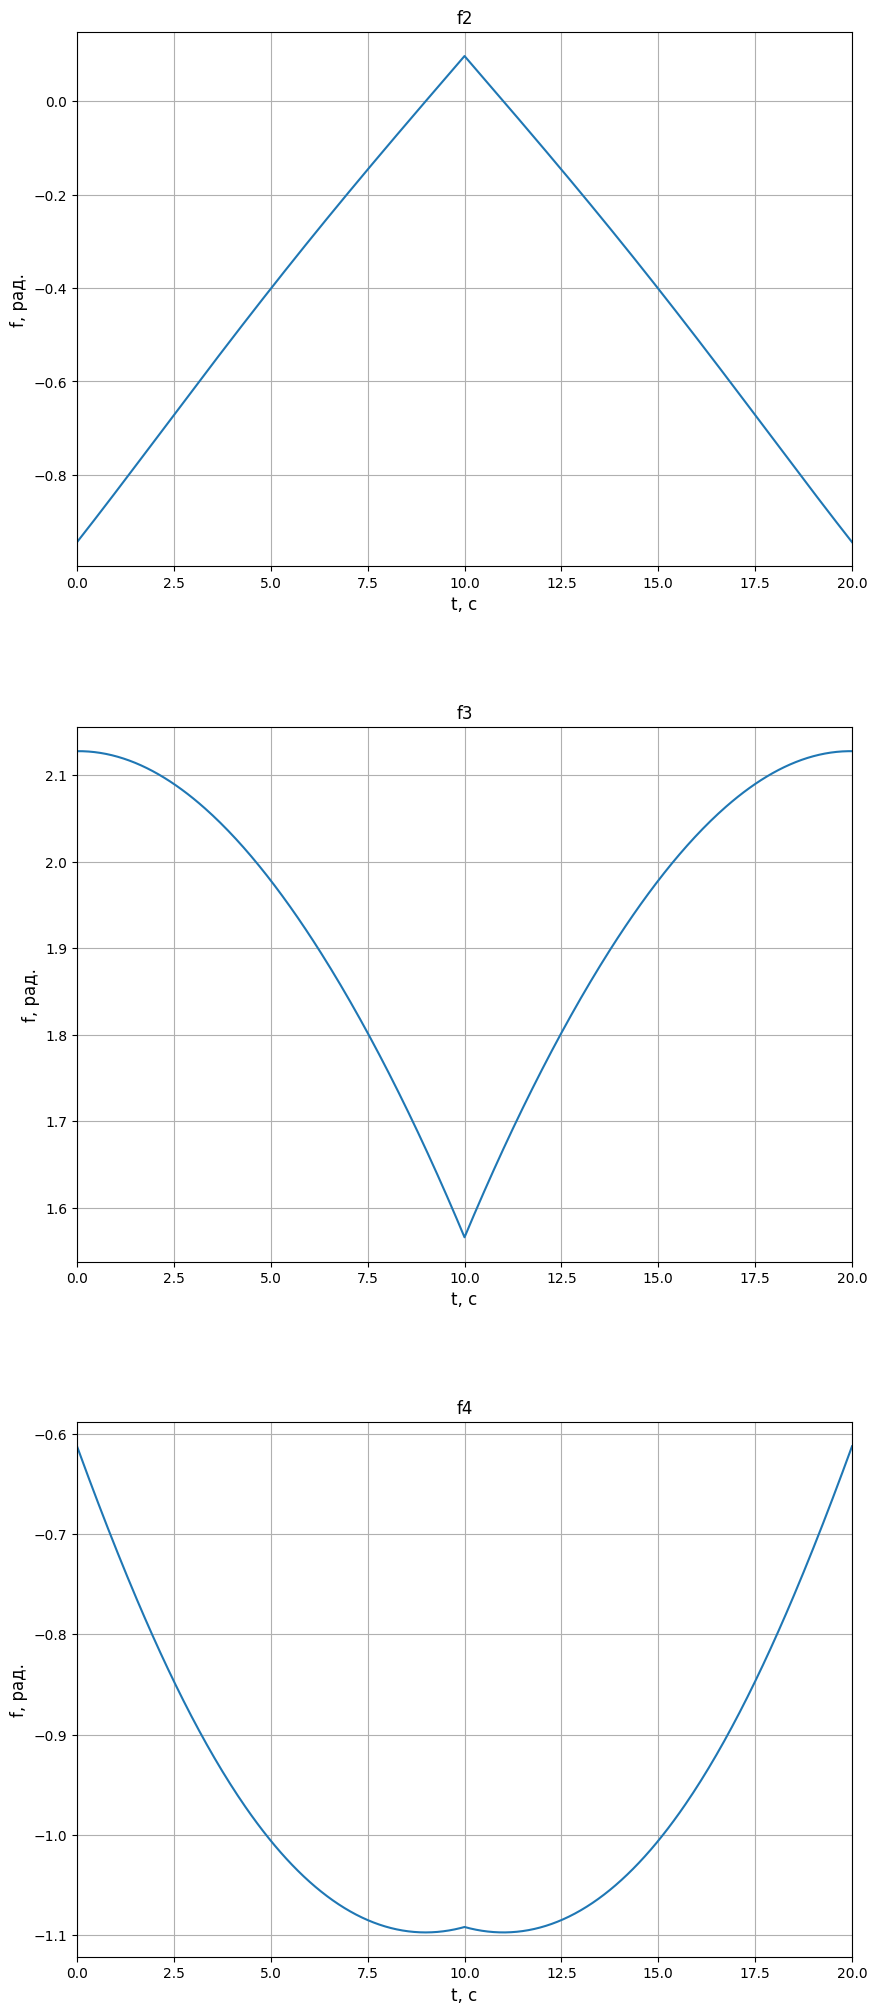

In [172]:
plot_f(data2_ideal)

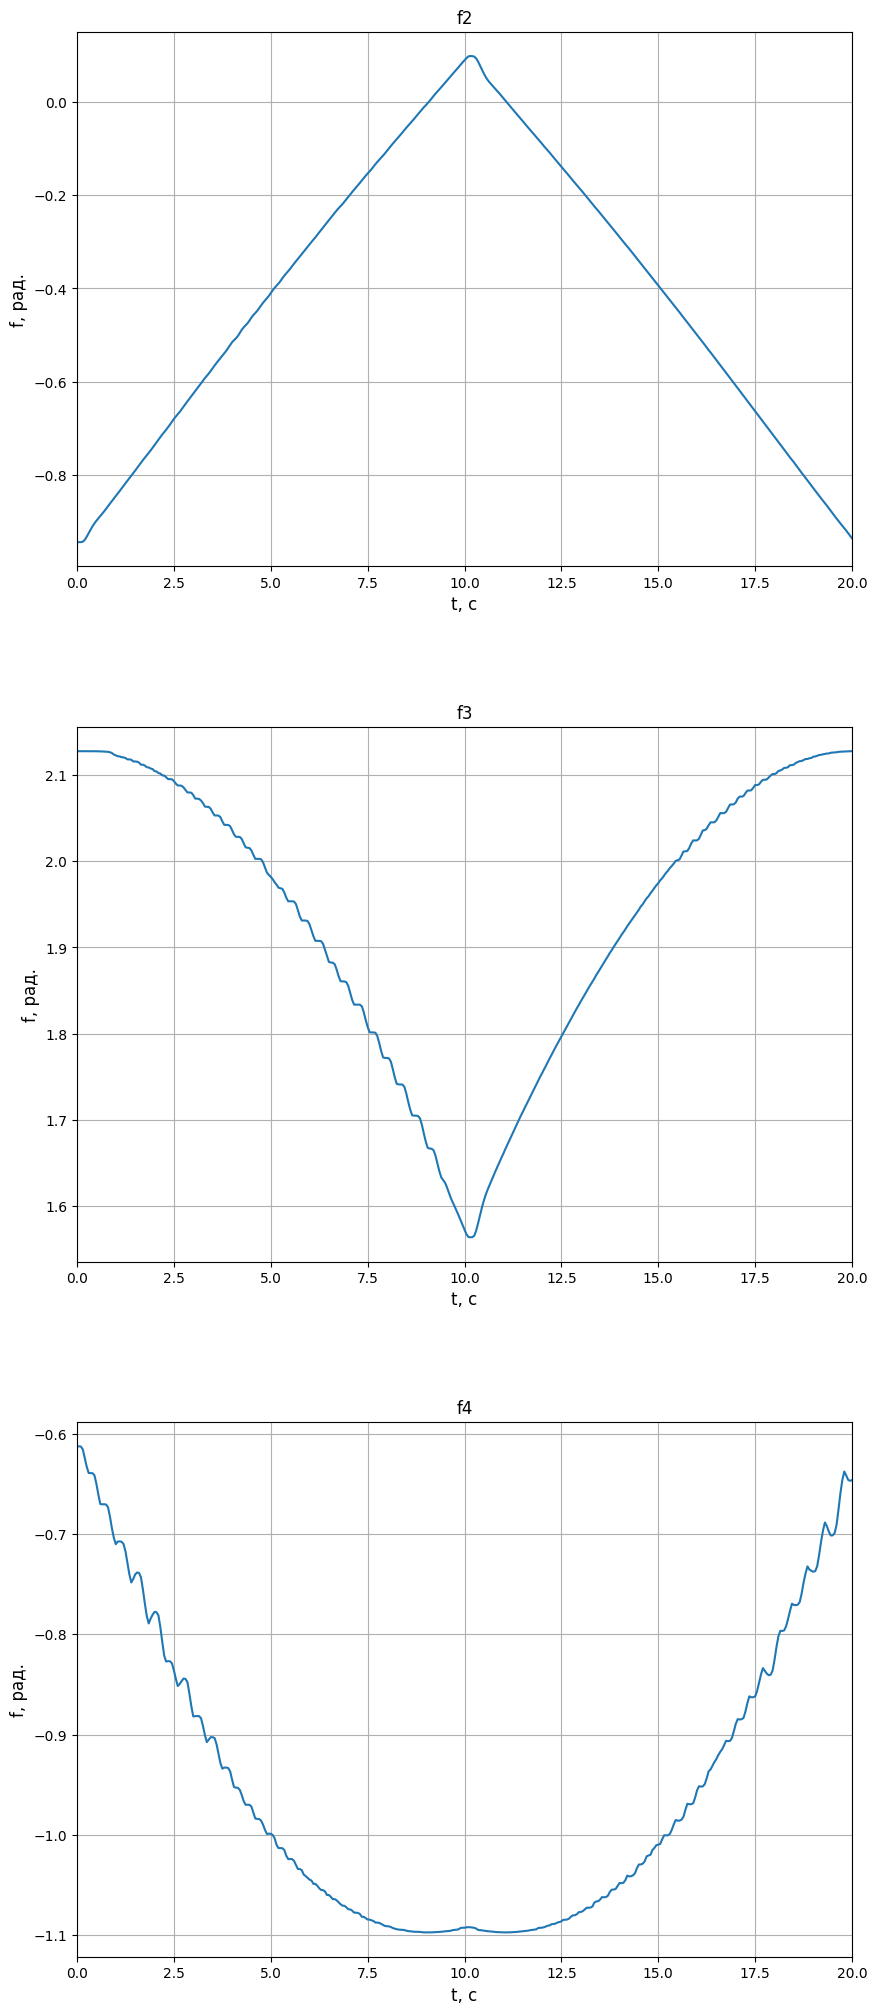

In [173]:
plot_f(data2_real)

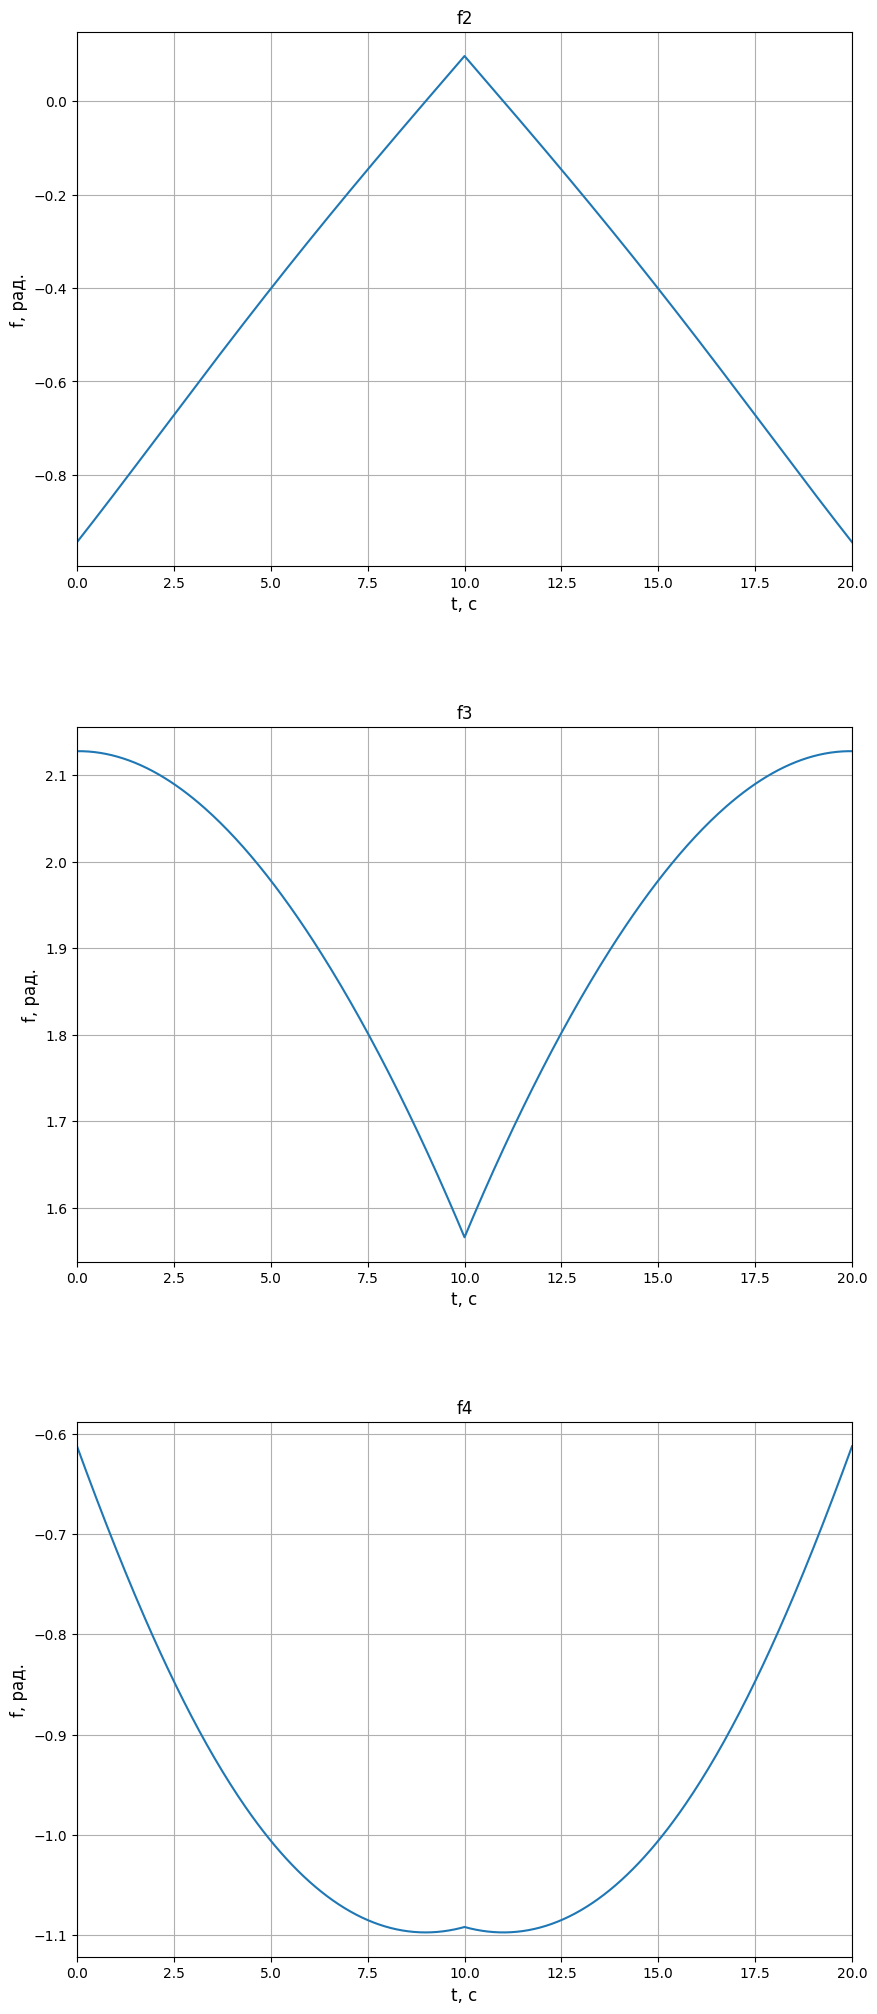

In [174]:
plot_f(data3_ideal)

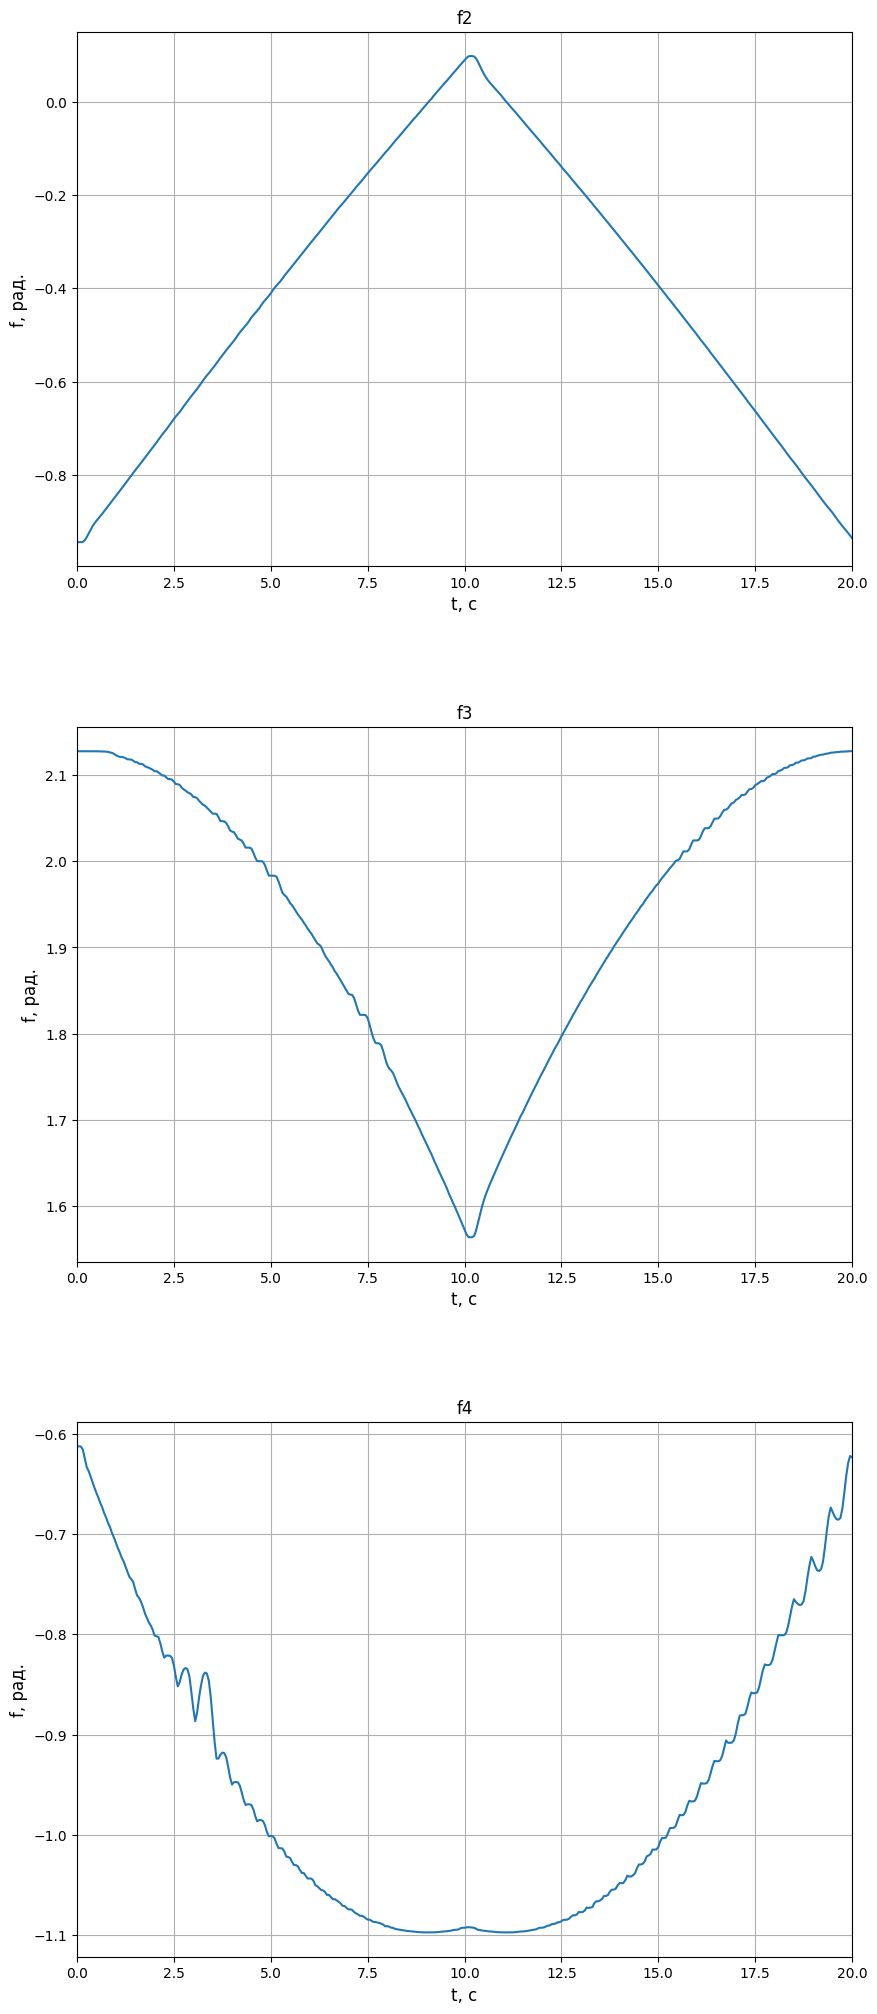

In [175]:
plot_f(data3_real)

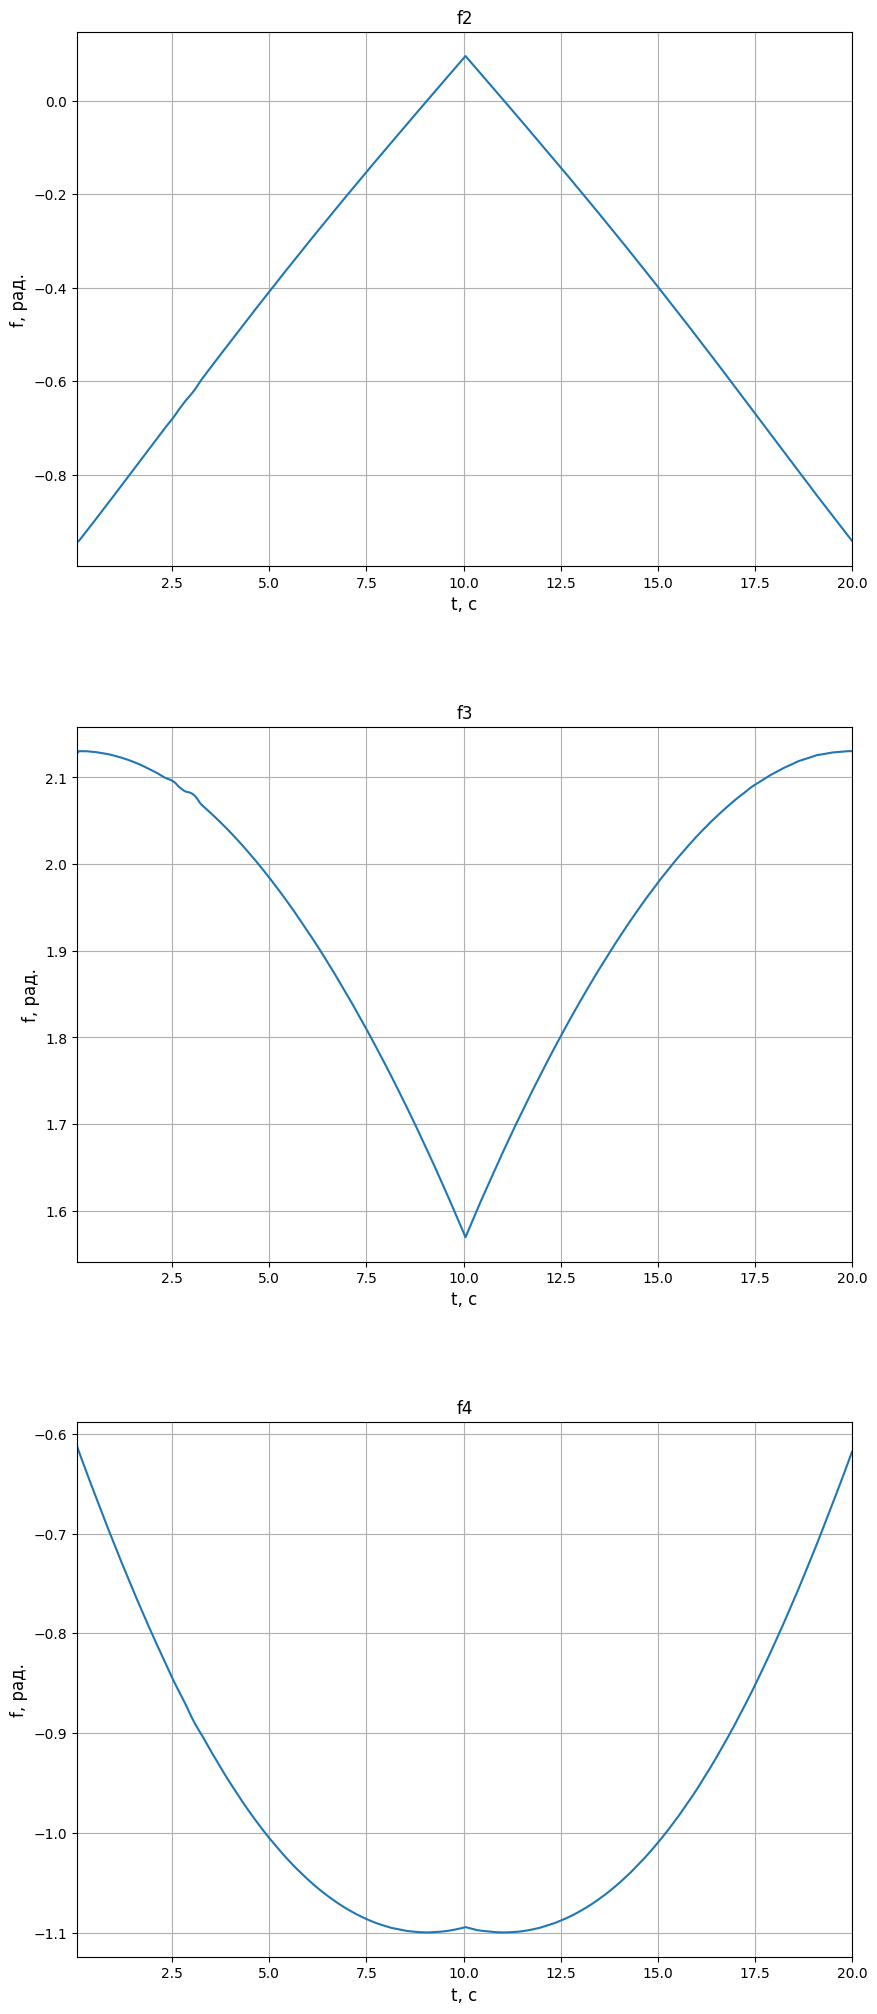

In [176]:
plot_f(data4_ideal)

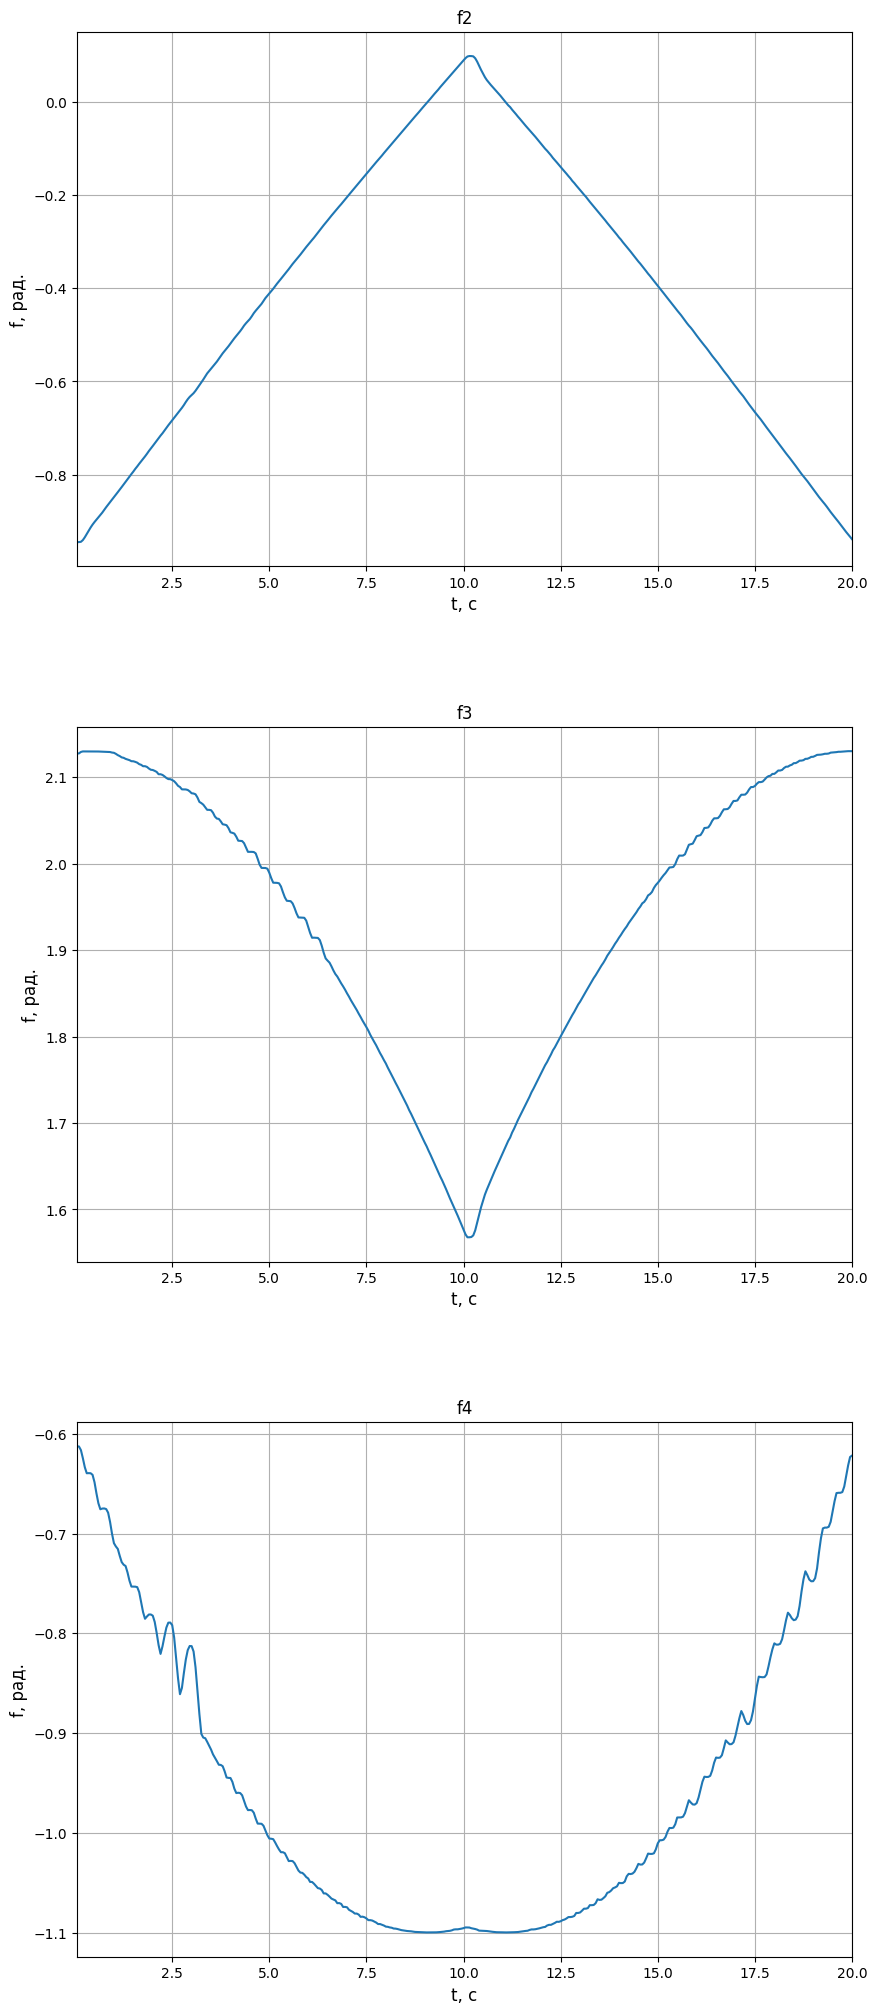

In [177]:
plot_f(data4_real)

### Сравнение полученной траектории движения с идеальной

In [178]:
def x_z_theta(f2, f3, f4):
  xA = d1 + l2*np.sin(f2) + l3*np.sin(f2 + f3) + l45*np.sin(f2 + f3 + f4)
  zA = l1 + l2*np.cos(f2) + l3*np.cos(f2 + f3) + l45*np.cos(f2 + f3 + f4)
  theta = f2 + f3 + f4 - np.pi/2
  return xA, zA, theta

In [179]:
data2_ideal['xA'], data2_ideal['zA'], data2_ideal['theta'] = x_z_theta(data2_ideal['f2'].values, data2_ideal['f3'].values, data2_ideal['f4'].values)
data2_real['xA'], data2_real['zA'], data2_real['theta'] = x_z_theta(data2_real['f2'].values, data2_real['f3'].values, data2_real['f4'].values)
data3_ideal['xA'], data3_ideal['zA'], data3_ideal['theta'] = x_z_theta(data3_ideal['f2'].values, data3_ideal['f3'].values, data3_ideal['f4'].values)
data3_real['xA'], data3_real['zA'], data3_real['theta'] = x_z_theta(data3_real['f2'].values, data3_real['f3'].values, data3_real['f4'].values)
data4_ideal['xA'], data4_ideal['zA'], data4_ideal['theta'] = x_z_theta(data4_ideal['f2'].values, data4_ideal['f3'].values, data4_ideal['f4'].values)
data4_real['xA'], data4_real['zA'], data4_real['theta'] = x_z_theta(data4_real['f2'].values, data4_real['f3'].values, data4_real['f4'].values)

In [180]:
def plot_x_z_theta(df_id, df_r):
  plt.figure(figsize=(8, 8))
  plt.plot(df_id['xA'], df_id['zA'], label='track_ideal')
  plt.plot(df_r['xA'], df_r['zA'], label='track_real')
  plt.plot(df_r['xA'].values[0], df_r['zA'].values[0], 'ro', label='start_real')
  plt.plot(df_r['xA'].values[-1], df_r['zA'].values[-1], 'bo', label='end_real')
  plt.title('2D track')
  plt.xlabel('xA, m')
  plt.ylabel('zA, m')
  plt.legend()
  plt.grid()
  plt.show()

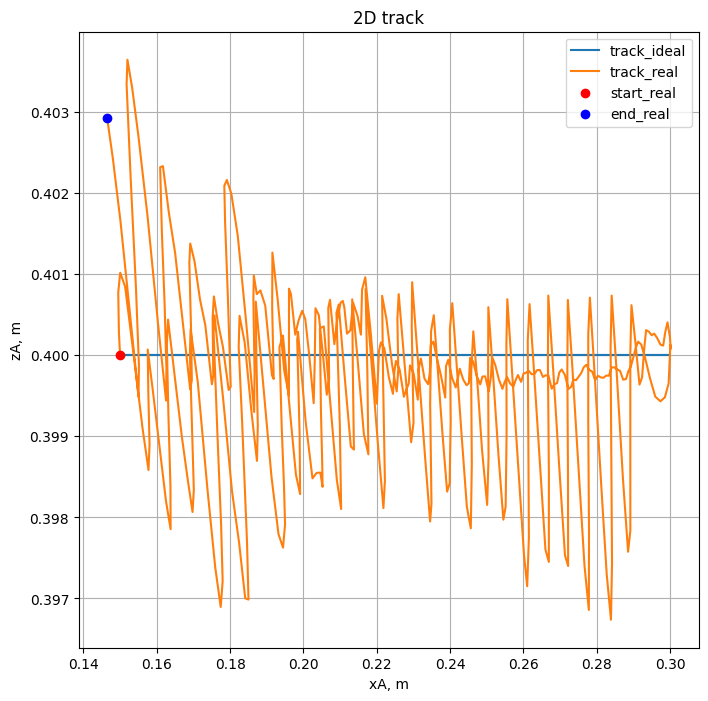

In [181]:
plot_x_z_theta(data2_ideal, data2_real)

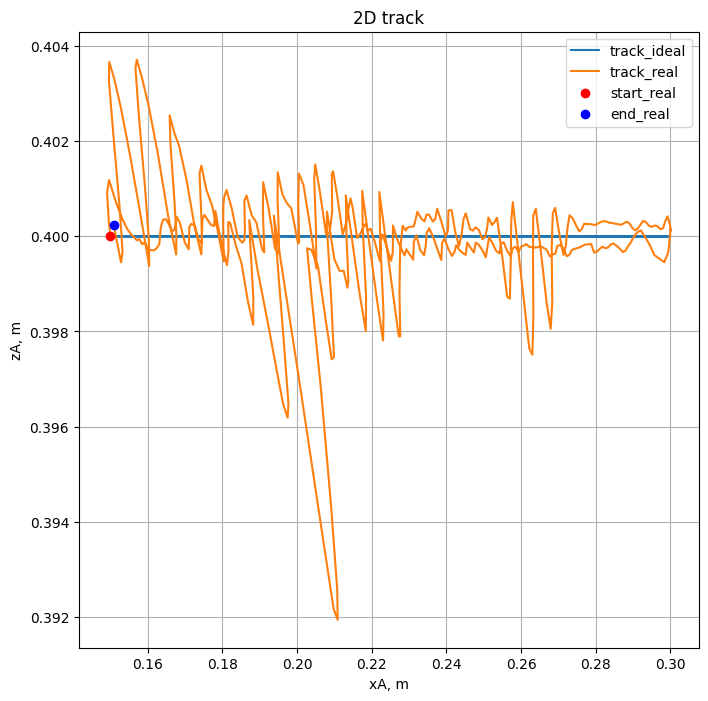

In [182]:
plot_x_z_theta(data3_ideal, data3_real)

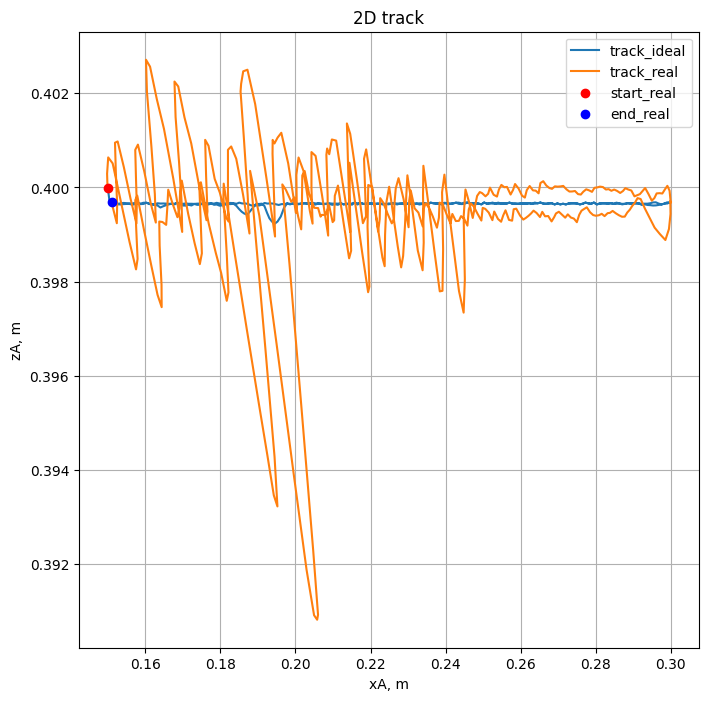

In [183]:
plot_x_z_theta(data4_ideal, data4_real)

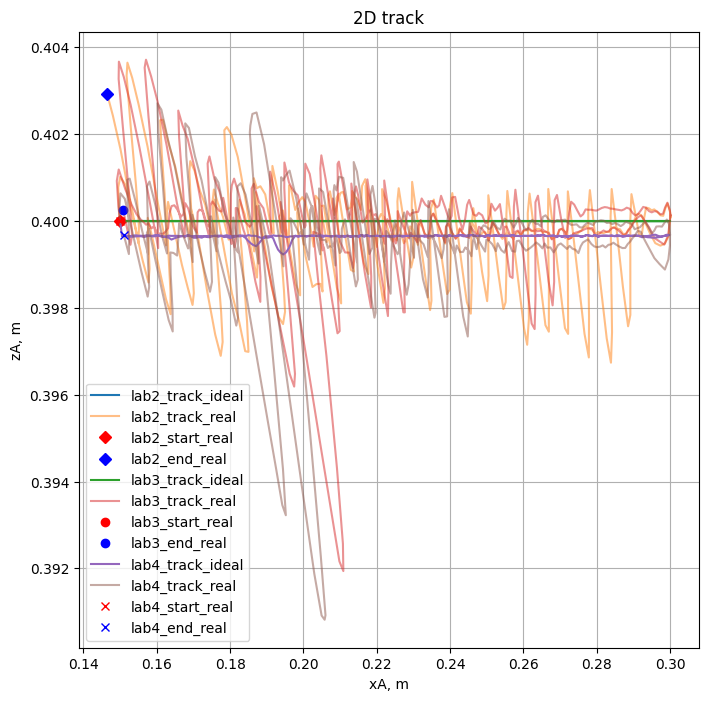

In [184]:
plt.figure(figsize=(8, 8))
plt.plot(data2_ideal['xA'], data2_ideal['zA'], label='lab2_track_ideal')
plt.plot(data2_real['xA'], data2_real['zA'], label='lab2_track_real', alpha=0.5)
plt.plot(data2_real['xA'].values[0], data2_real['zA'].values[0], 'rD', label='lab2_start_real')
plt.plot(data2_real['xA'].values[-1], data2_real['zA'].values[-1], 'bD', label='lab2_end_real')
plt.plot(data3_ideal['xA'], data3_ideal['zA'], label='lab3_track_ideal')
plt.plot(data3_real['xA'], data3_real['zA'], label='lab3_track_real', alpha=0.5)
plt.plot(data3_real['xA'].values[0], data3_real['zA'].values[0], 'ro', label='lab3_start_real')
plt.plot(data3_real['xA'].values[-1], data3_real['zA'].values[-1], 'bo', label='lab3_end_real')
plt.plot(data4_ideal['xA'], data4_ideal['zA'], label='lab4_track_ideal')
plt.plot(data4_real['xA'], data4_real['zA'], label='lab4_track_real', alpha=0.5)
plt.plot(data4_real['xA'].values[0], data4_real['zA'].values[0], 'rx', label='lab4_start_real')
plt.plot(data4_real['xA'].values[-1], data4_real['zA'].values[-1], 'bx', label='lab4_end_real')
plt.title('2D track')
plt.xlabel('xA, m')
plt.ylabel('zA, m')
plt.legend()
plt.grid()
plt.show()

### Погрешности при движении по траектории

In [185]:
data2_diff = data2_real[['f2', 'f3', 'f4', 'xA', 'zA', 'theta']] - data2_ideal[['f2', 'f3', 'f4', 'xA', 'zA', 'theta']]
data2_diff['t'] = data2_real['t']
data2_diff.head()

,f2,f3,f4,xA,zA,theta,t
0,0.000003,-0.000002,0.000001,5.949694e-07,9.188724e-08,0.000002,0.00
1,-0.005280,-0.000011,0.005292,-7.494050e-04,9.188724e-08,0.000002,0.05
2,-0.010533,0.000013,0.010319,-1.530893e-03,2.399647e-05,-0.000201,0.10
3,-0.015023,0.000068,0.012582,-2.563019e-03,2.791483e-04,-0.002372,0.15
4,-0.016139,0.000139,0.009382,-3.497703e-03,7.774497e-04,-0.006618,0.20


In [186]:
data3_diff = data3_real[['f2', 'f3', 'f4', 'xA', 'zA', 'theta']] - data3_ideal[['f2', 'f3', 'f4', 'xA', 'zA', 'theta']]
data3_diff['t'] = data3_real['t']
data3_diff.head()

,f2,f3,f4,xA,zA,theta,t
0,0.000003,-0.000002,0.000001,5.949694e-07,9.188724e-08,0.000002,0.00
1,-0.005274,-0.000026,0.005302,-7.493936e-04,2.073951e-06,0.000002,0.05
2,-0.010538,0.000013,0.010352,-1.526437e-03,2.074071e-05,-0.000174,0.10
3,-0.015400,0.000068,0.012460,-2.708190e-03,3.374977e-04,-0.002872,0.15
4,-0.017272,0.000139,0.009237,-3.893295e-03,9.259717e-04,-0.007895,0.20


In [187]:
data4_diff = data4_real[['f2', 'f3', 'f4', 'xA', 'zA', 'theta']] - data4_ideal[['f2', 'f3', 'f4', 'xA', 'zA', 'theta']]
data4_diff['t'] = data4_real['t']
data4_diff.head()

,f2,f3,f4,xA,zA,theta,t
0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000e+00,0.05
1,-0.0027,-0.0026,0.0053,-0.000514,0.000325,-2.220446e-16,0.10
2,-0.0074,-0.0009,0.0070,-0.001331,0.000267,-1.300000e-03,0.15
3,-0.0090,-0.0003,0.0042,-0.002224,0.000642,-5.100000e-03,0.20
4,-0.0083,-0.0003,0.0005,-0.002677,0.000997,-8.100000e-03,0.25


In [188]:
def plot_x_z_theta(df):
  fig, ax = plt.subplots(nrows=3, figsize=(10, 25))
  axs = ax.flatten()

  axs[0].plot(df['t'], df['xA'])
  axs[0].plot([0, 20], [0, 0])
  axs[0].set_title('xA')
  axs[0].set_xlabel("t, c", fontsize=12)
  axs[0].set_ylabel("xA, m", fontsize=12)
  axs[0].set_xlim(min(df['t']), max(df['t']))
  axs[0].grid()

  axs[1].plot(df['t'], df['zA'])
  axs[1].plot([0, 20], [0, 0])
  axs[1].set_title('zA')
  axs[1].set_xlabel("t, c", fontsize=12)
  axs[1].set_ylabel("zA, m", fontsize=12)
  axs[1].set_xlim(min(df['t']), max(df['t']))
  axs[1].grid()

  axs[2].plot(df['t'], df['theta'])
  axs[2].plot([0, 20], [0, 0])
  axs[2].set_title('theta')
  axs[2].set_xlabel("t, c", fontsize=12)
  axs[2].set_ylabel("theta, рад.", fontsize=12)
  axs[2].set_xlim(min(df['t']), max(df['t']))
  axs[2].grid()

  plt.subplots_adjust(hspace=0.3)

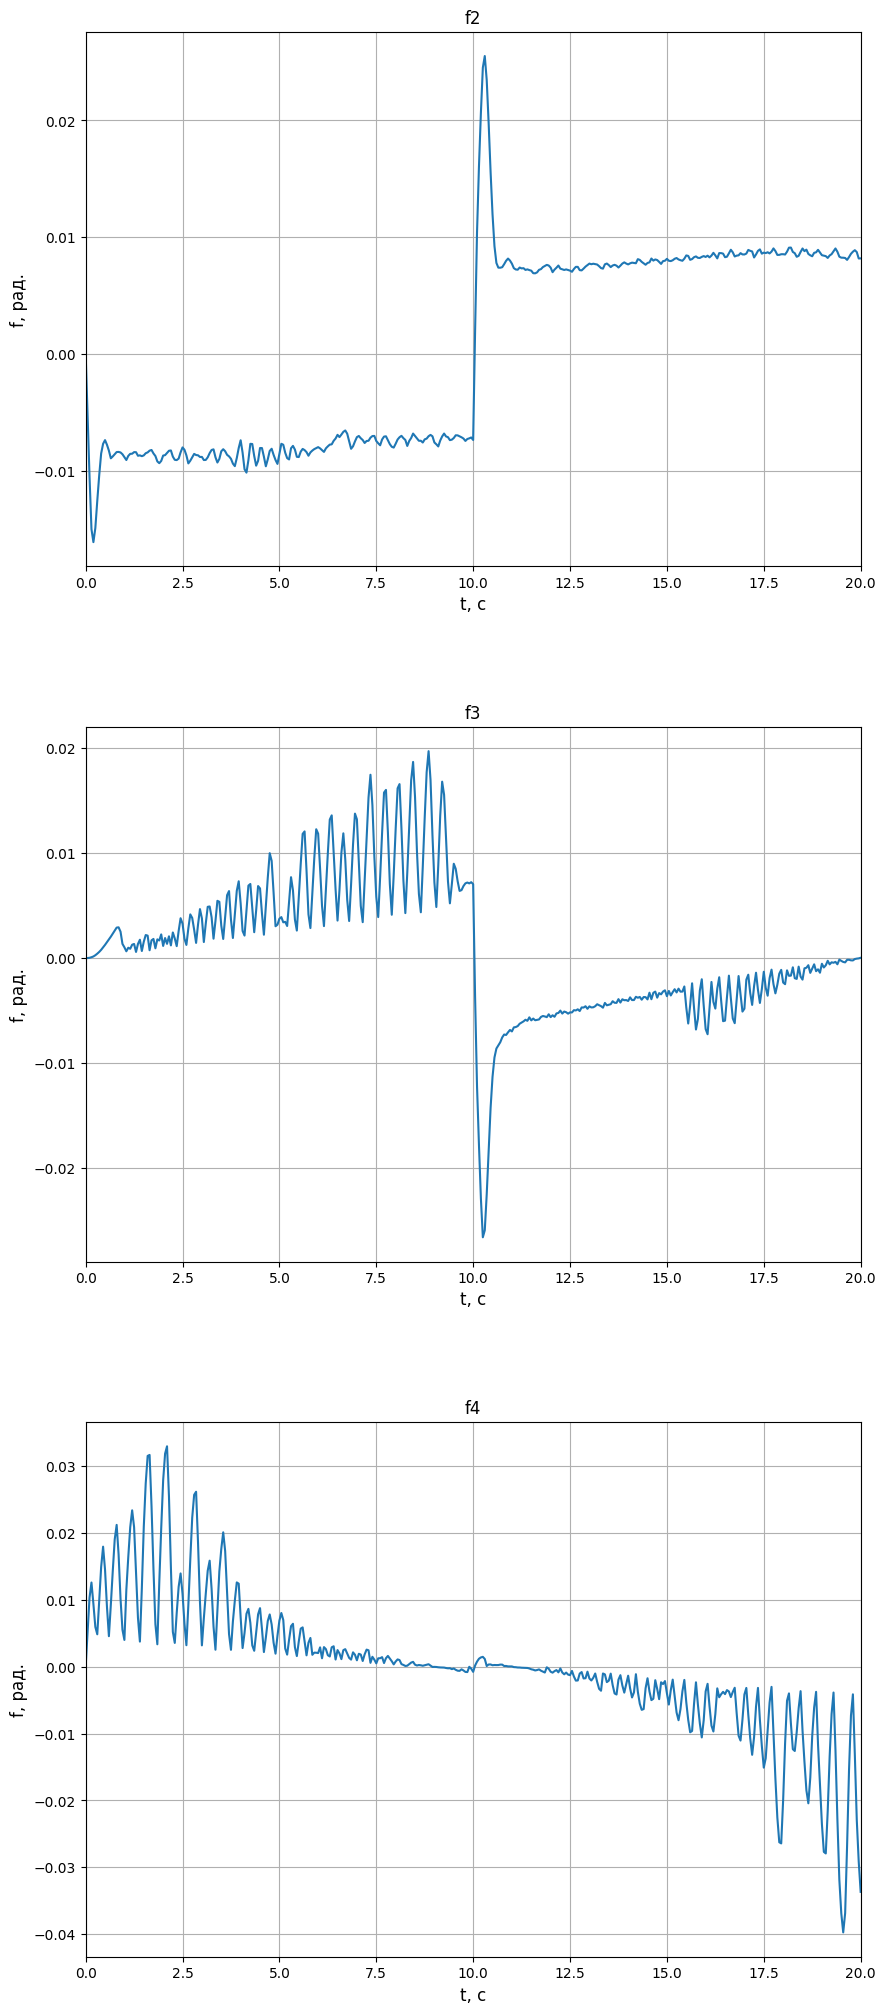

In [189]:
plot_f(data2_diff)

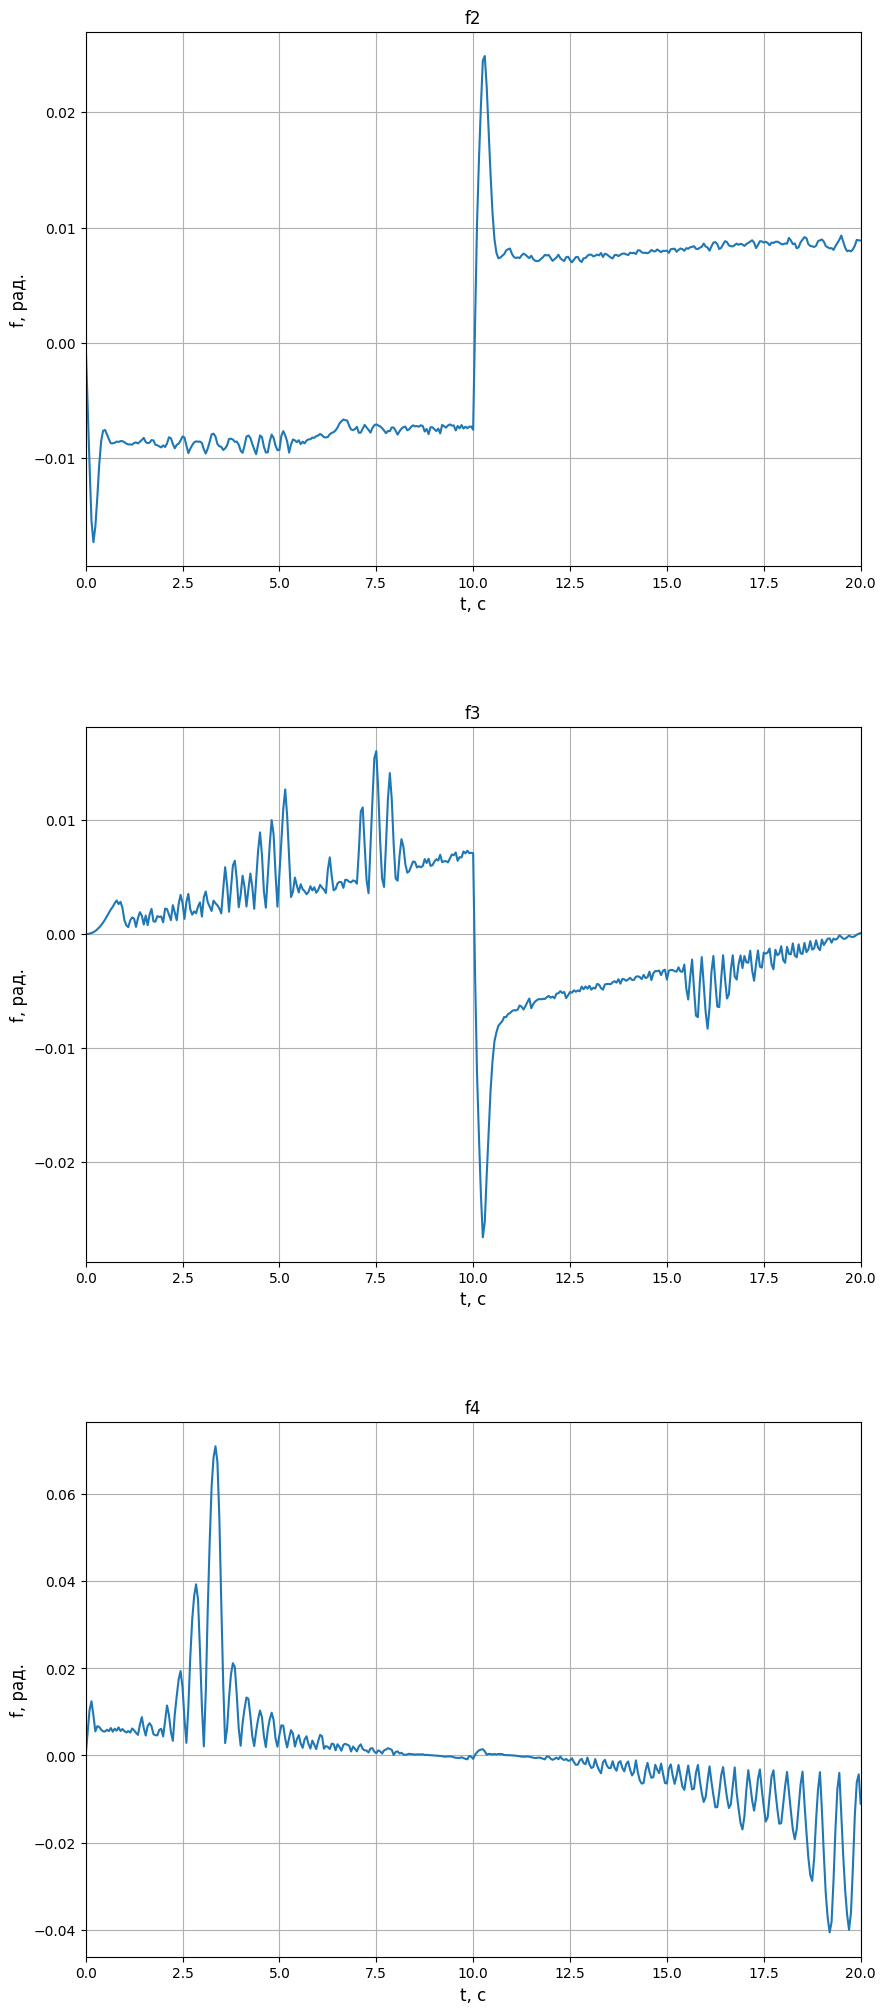

In [190]:
plot_f(data3_diff)

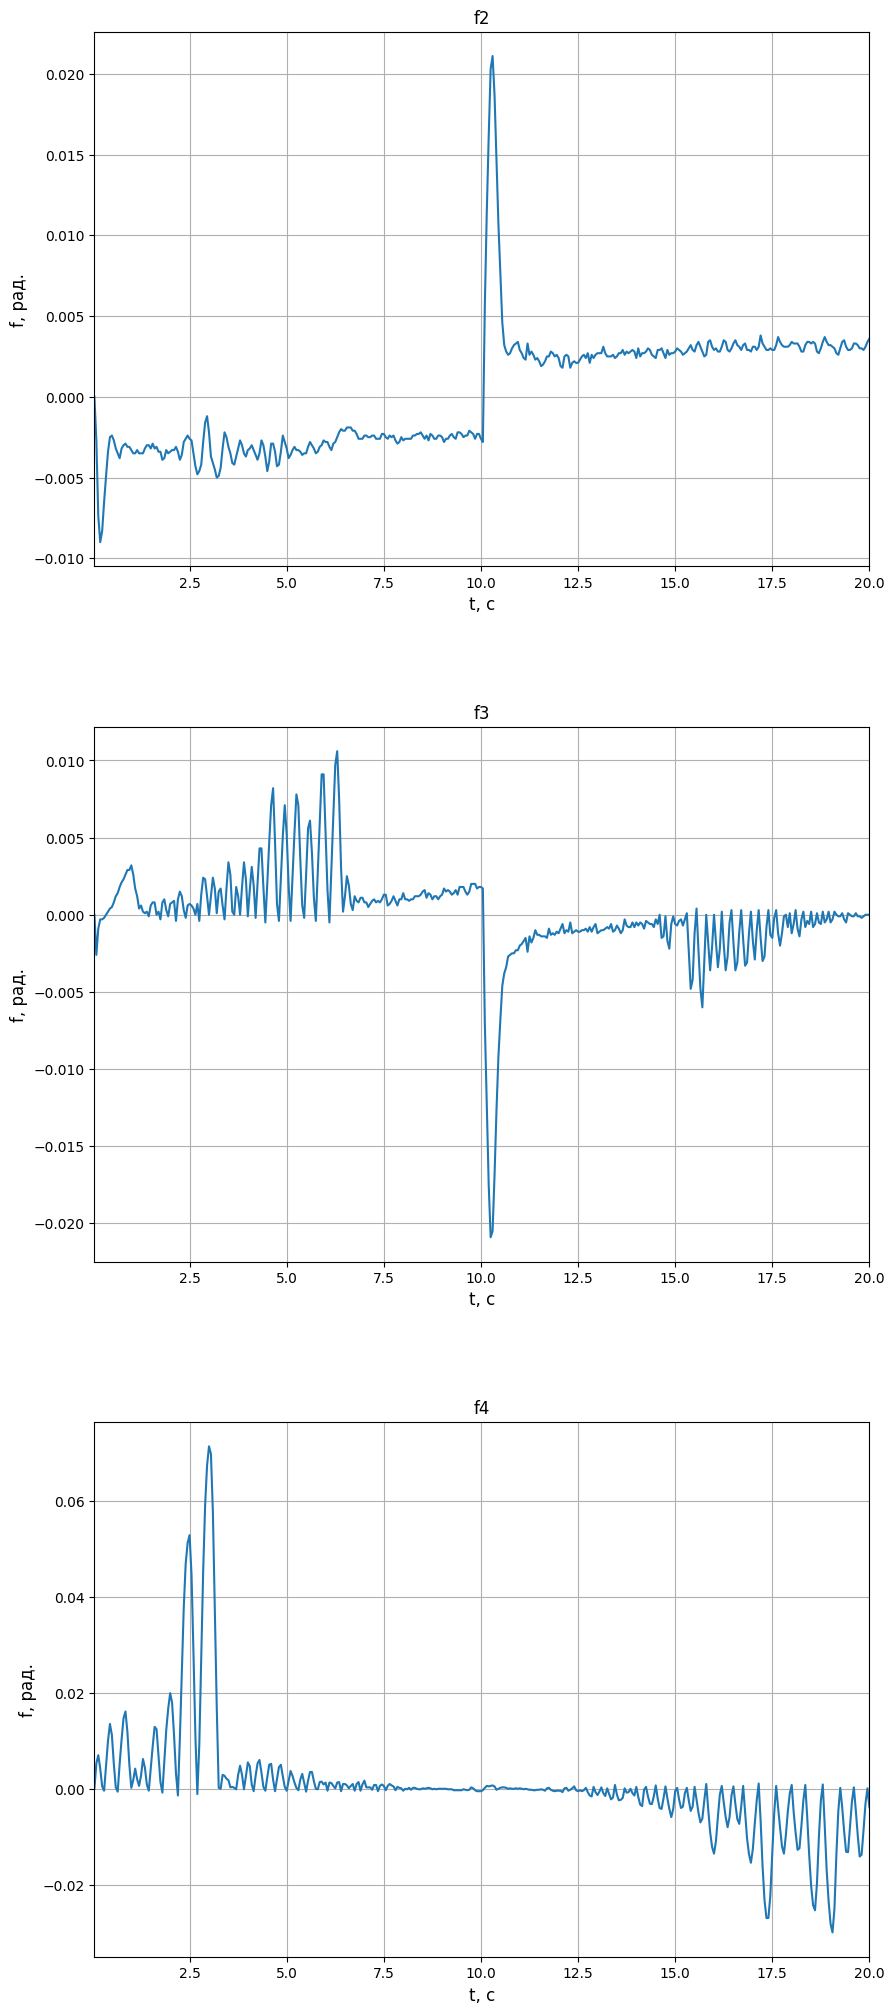

In [191]:
plot_f(data4_diff)

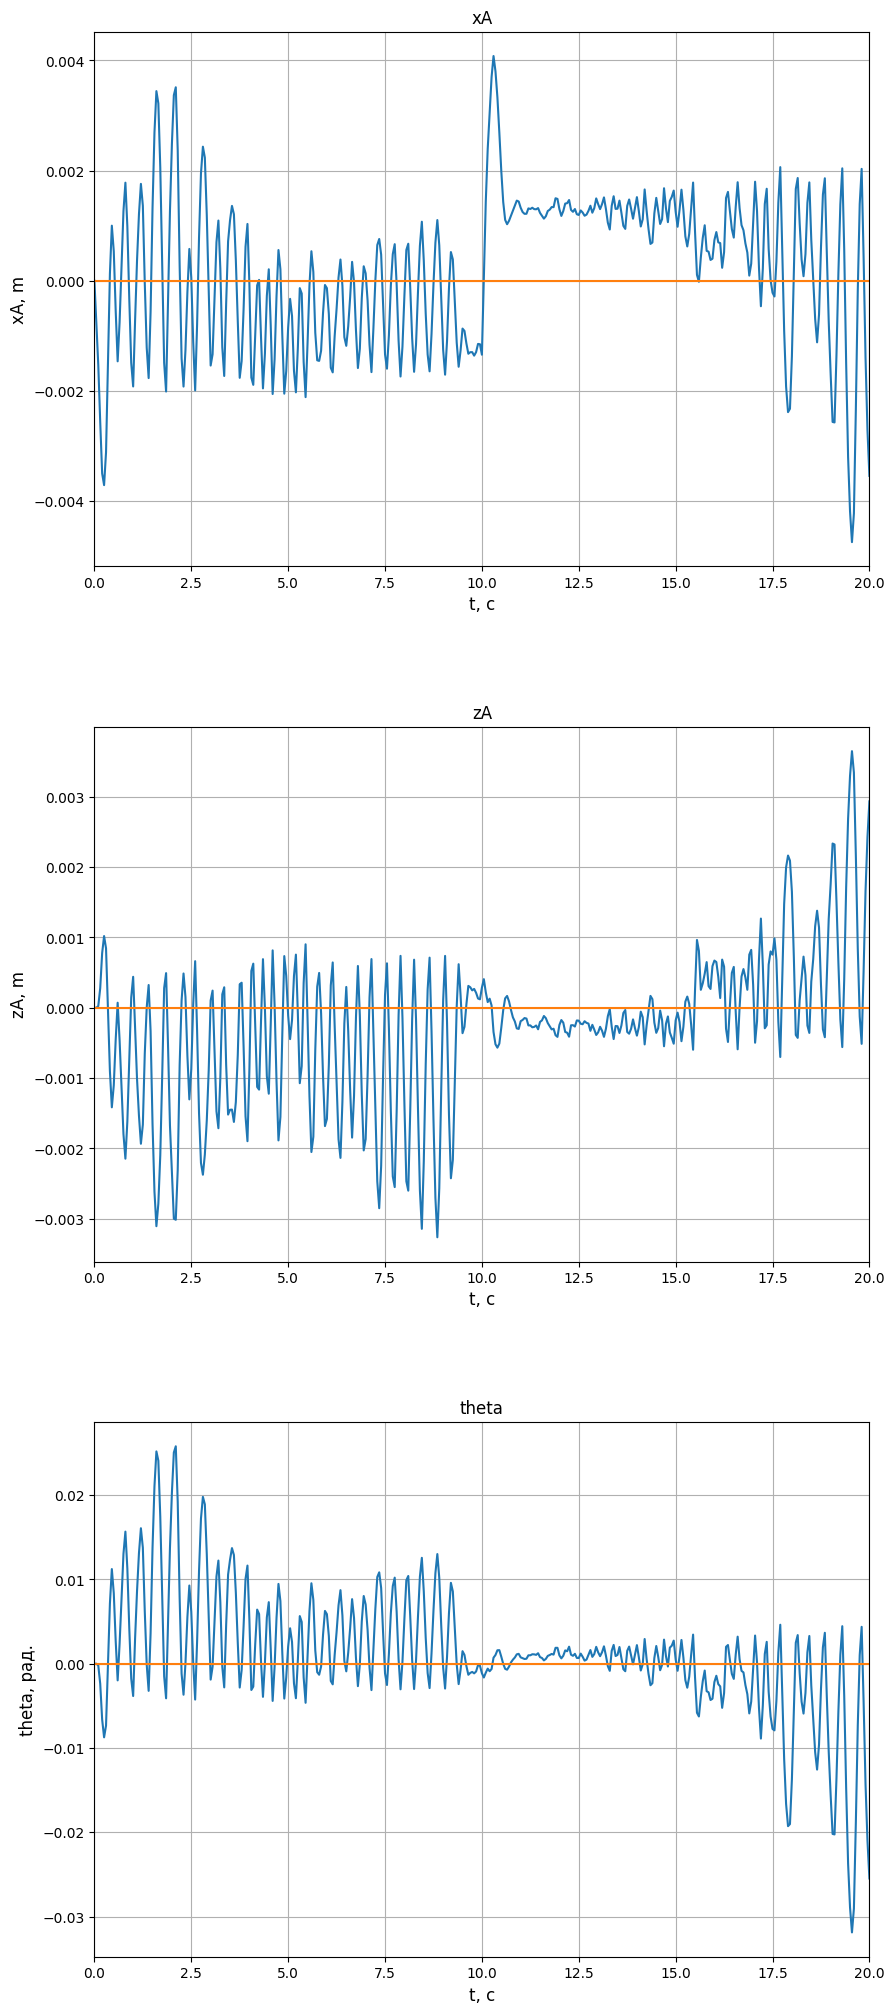

In [192]:
plot_x_z_theta(data2_diff)

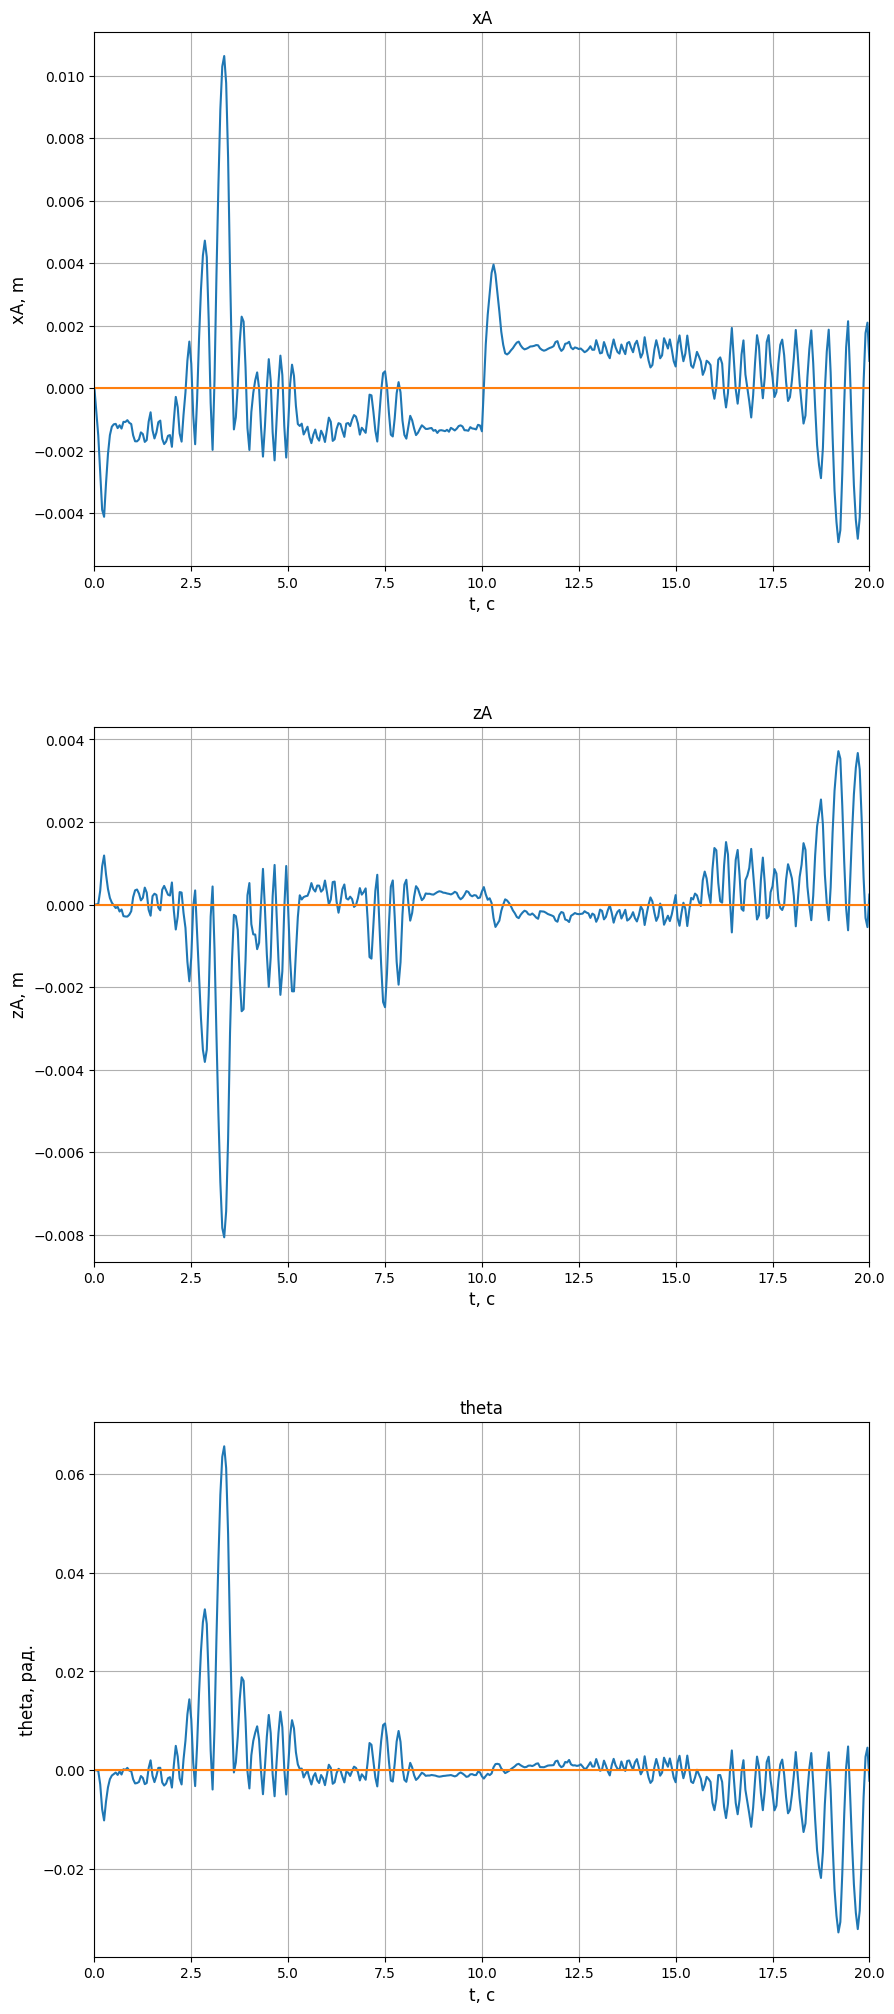

In [193]:
plot_x_z_theta(data3_diff)

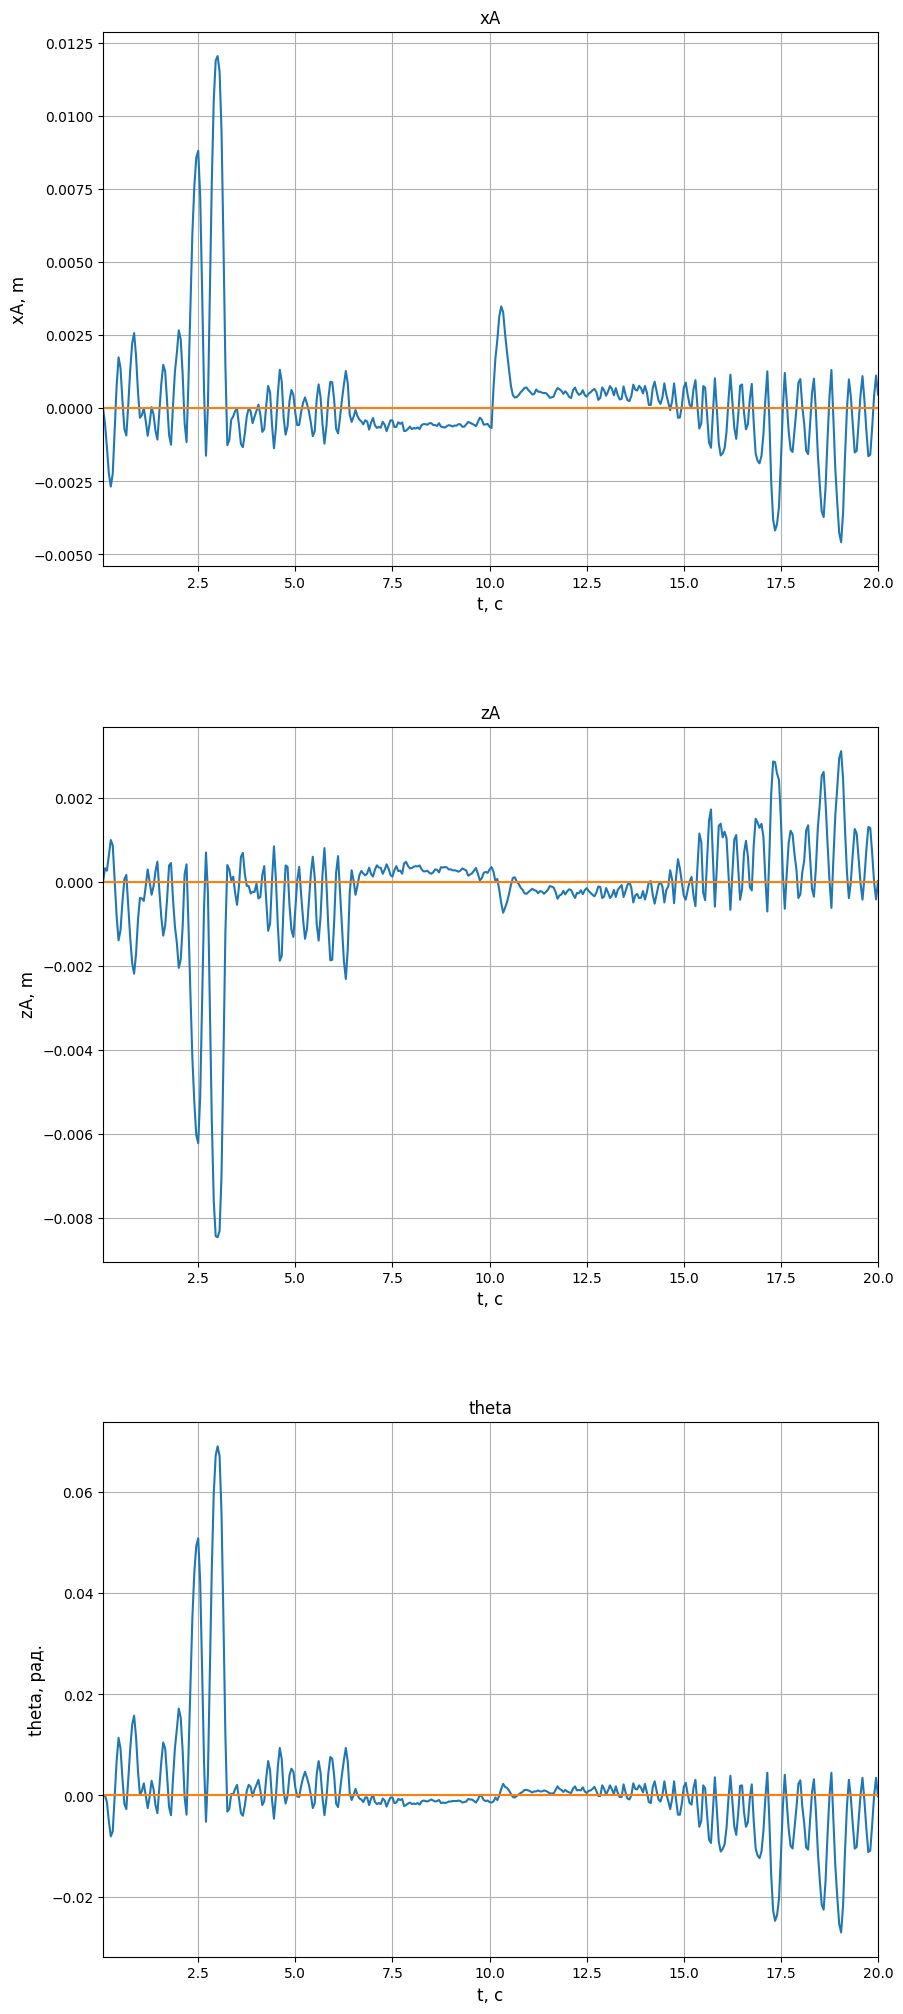

In [194]:
plot_x_z_theta(data4_diff)

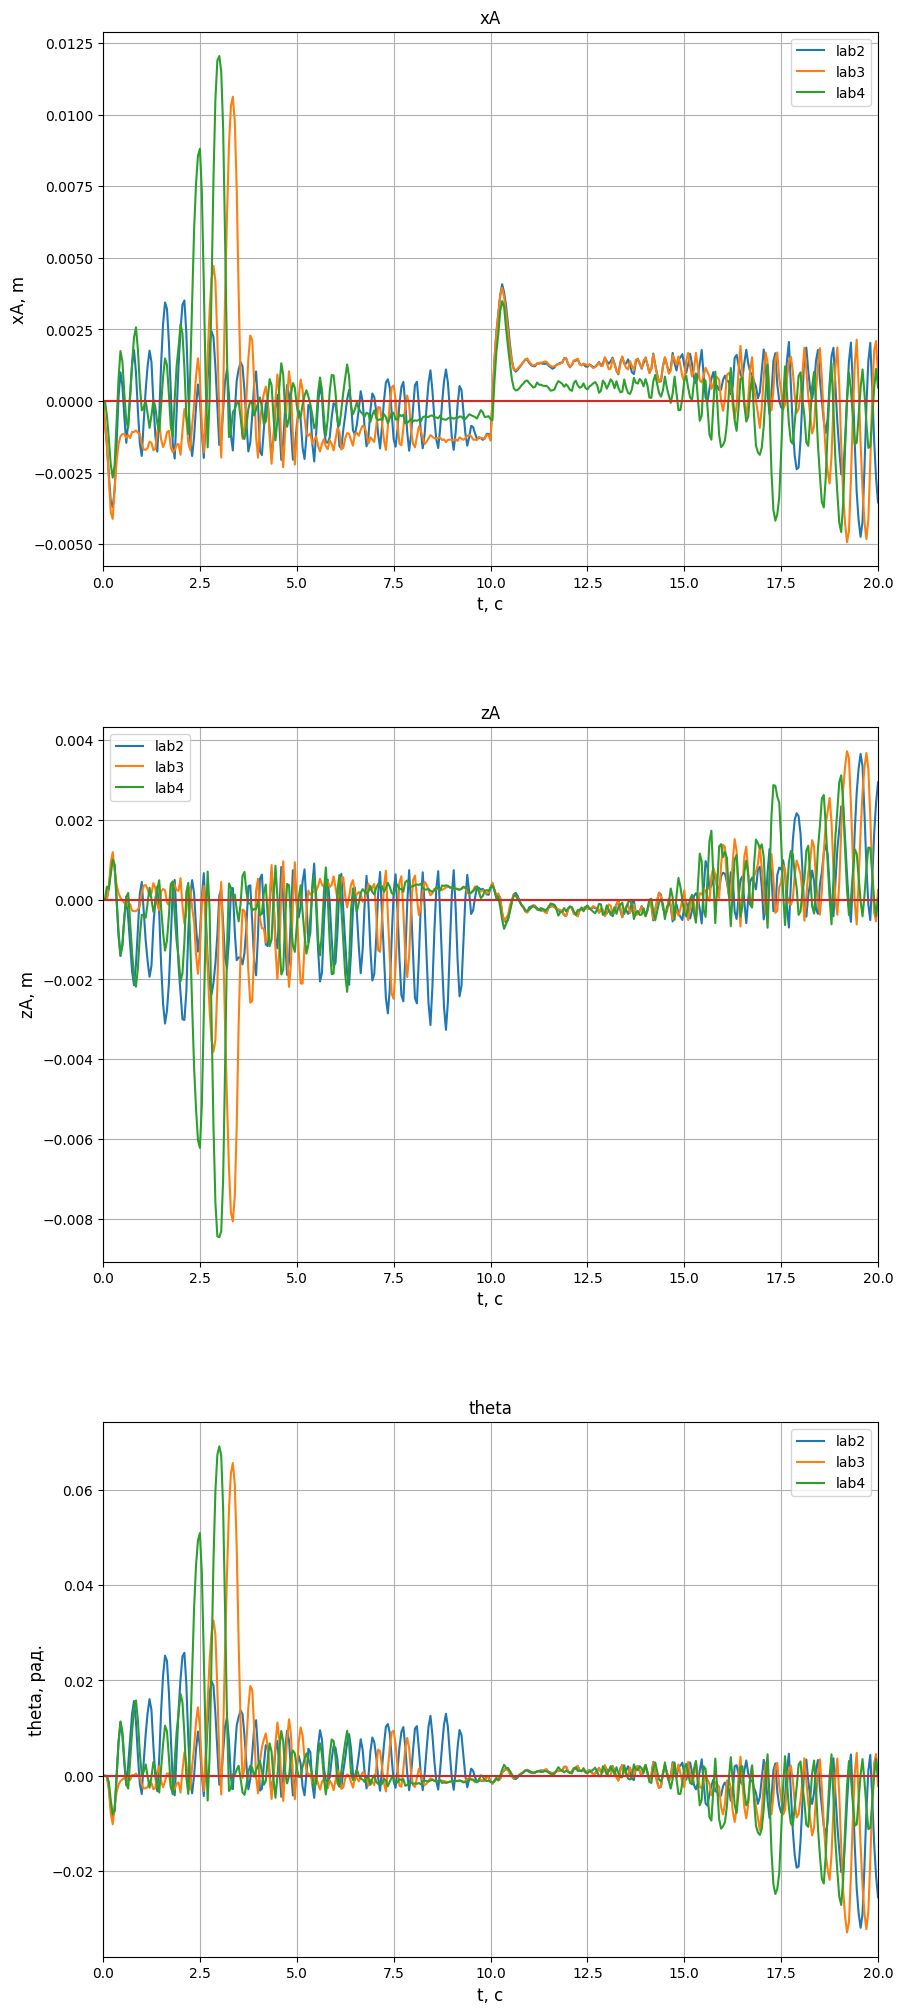

In [195]:
fig, ax = plt.subplots(nrows=3, figsize=(10, 25))
axs = ax.flatten()

axs[0].plot(data2_diff['t'], data2_diff['xA'], label='lab2')
axs[0].plot(data3_diff['t'], data3_diff['xA'], label='lab3')
axs[0].plot(data4_diff['t'], data4_diff['xA'], label='lab4')
axs[0].plot([0, 20], [0, 0])
axs[0].set_title('xA')
axs[0].set_xlabel("t, c", fontsize=12)
axs[0].set_ylabel("xA, m", fontsize=12)
axs[0].set_xlim(min(data3_diff['t']), max(data3_diff['t']))
axs[0].legend()
axs[0].grid()

axs[1].plot(data2_diff['t'], data2_diff['zA'], label='lab2')
axs[1].plot(data3_diff['t'], data3_diff['zA'], label='lab3')
axs[1].plot(data4_diff['t'], data4_diff['zA'], label='lab4')
axs[1].plot([0, 20], [0, 0])
axs[1].set_title('zA')
axs[1].set_xlabel("t, c", fontsize=12)
axs[1].set_ylabel("zA, m", fontsize=12)
axs[1].set_xlim(min(data3_diff['t']), max(data3_diff['t']))
axs[1].legend()
axs[1].grid()

axs[2].plot(data2_diff['t'], data2_diff['theta'], label='lab2')
axs[2].plot(data3_diff['t'], data3_diff['theta'], label='lab3')
axs[2].plot(data4_diff['t'], data4_diff['theta'], label='lab4')
axs[2].plot([0, 20], [0, 0])
axs[2].set_title('theta')
axs[2].set_xlabel("t, c", fontsize=12)
axs[2].set_ylabel("theta, рад.", fontsize=12)
axs[2].set_xlim(min(data3_diff['t']), max(data3_diff['t']))
axs[2].legend()
axs[2].grid()

plt.subplots_adjust(hspace=0.3)

#### СКО и мат. ожидание для разниц идеальных координат с реальными

In [196]:
def math_e(series):
  return series.sum()/len(series)

In [197]:
def s_dev(series, Math_e):
  return (sum((series - Math_e)**2)/len(series))**(1/2)

In [198]:
def get_table_Math_SKO(ddf):
  df_math_sko = pd.DataFrame({ 
     'f2': [math_e(ddf['f2']),
           s_dev(ddf['f2'], math_e(ddf['f2']))],
     'f3': [math_e(ddf['f3']),
           s_dev(ddf['f3'], math_e(ddf['f3']))],
     'f4': [math_e(ddf['f4']),
           s_dev(ddf['f4'], math_e(ddf['f4']))],
     'xA': [math_e(ddf['xA']),
           s_dev(ddf['xA'], math_e(ddf['xA']))], 
     'zA': [math_e(ddf['zA']),
           s_dev(ddf['zA'], math_e(ddf['zA']))], 
     'theta': [math_e(ddf['theta']),
           s_dev(ddf['theta'], math_e(ddf['theta']))]},
      index=["Math_ir", "SKO_ir"])
  return df_math_sko

In [199]:
df_math_sko_2 = get_table_Math_SKO(data2_diff)
df_math_sko_2

,f2,f3,f4,xA,zA,theta
Math_ir,0.000127,0.000817,0.000138,0.000208,-0.000276,0.001083
SKO_ir,0.008601,0.006752,0.010218,0.001394,0.001050,0.007342


In [200]:
df_math_sko_3 = get_table_Math_SKO(data3_diff)
df_math_sko_3

,f2,f3,f4,xA,zA,theta
Math_ir,0.000103,0.000090,0.000159,0.000076,-0.000094,0.000352
SKO_ir,0.008602,0.005645,0.012622,0.001883,0.001252,0.010012


In [201]:
df_math_sko_4 = get_table_Math_SKO(data4_diff)
df_math_sko_4

,f2,f3,f4,xA,zA,theta
Math_ir,0.000147,0.000031,0.000692,0.000177,-0.000153,0.000870
SKO_ir,0.003764,0.003104,0.011708,0.001942,0.001392,0.011042
